In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
df_tesla = pd.read_csv("datasets/Tesla.csv")

In [3]:
df_tesla.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN


In [4]:
df_tesla.set_index('date', inplace=True)

In [5]:
df_tesla.index.dtype

dtype('O')

In [6]:
if df_tesla.index.dtype == 'object':
    print("Changed")
    df_tesla.index = pd.to_datetime(df_tesla.index)

Changed


In [7]:
df_tesla.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN


In [8]:
df_tesla.index.dtype

dtype('<M8[ns]')

<Axes: xlabel='date'>

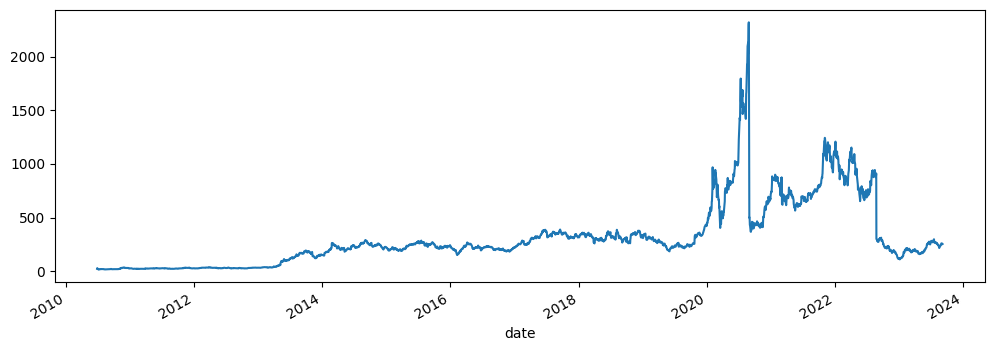

In [9]:
df_tesla['high'].plot(figsize=(12,4))

<Axes: xlabel='date'>

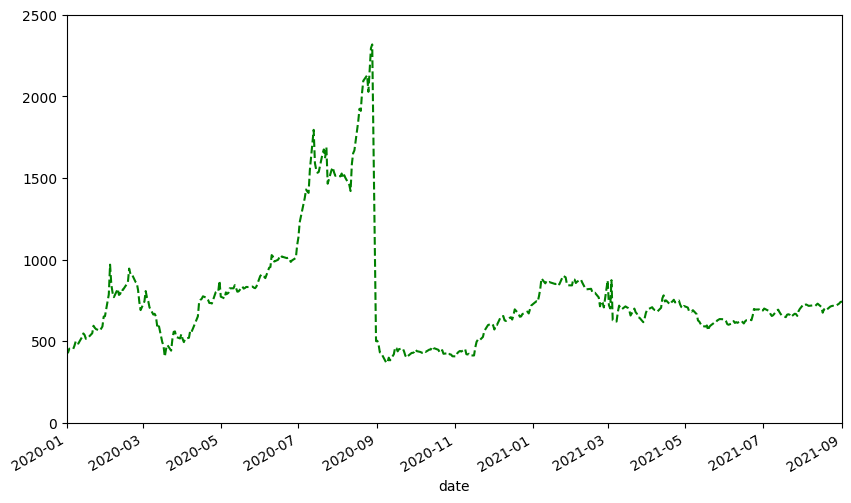

In [19]:
# Plot the DataFrame with xlim and ylim parameters
df_tesla['high'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 2500], figsize=(10, 6), c='green', ls='--')

In [20]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-05', '2023-09-06'],
              dtype='datetime64[ns]', name='date', length=3320, freq=None)

In [22]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['open']
share_open

date
2020-01-02    424.5000
2020-01-03    440.4999
2020-01-06    440.4699
2020-01-07    461.4000
2020-01-08    473.7000
                ...   
2021-08-26    708.3100
2021-08-27    705.0000
2021-08-30    714.7150
2021-08-31    733.0000
2021-09-01    734.0800
Name: open, Length: 421, dtype: float64

In [23]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='date', length=421, freq=None)

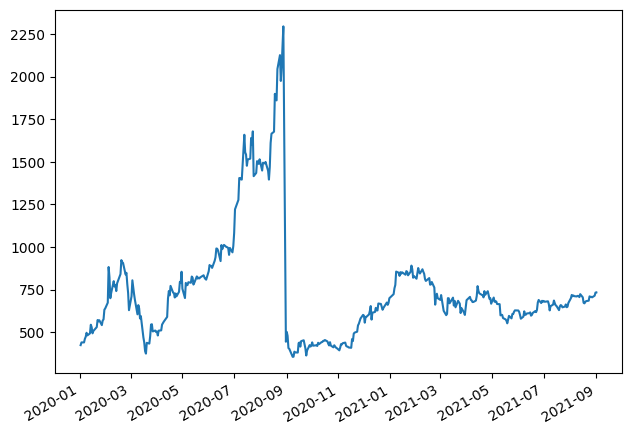

In [27]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [28]:
from datetime import datetime

#### Time Resampling

- Rule `A` is year end frequency
- 

In [29]:
df_tesla.head()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN


In [30]:
df_tesla.resample(rule="A").min()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
2010-12-31,16.1400,16.6299,14.9799,15.8001,118614,1.0533,-16.09,4.317139e+06
2011-12-31,21.7800,22.2699,21.1101,21.8301,239595,1.4553,-9.65,1.120778e+07
2012-12-31,26.6199,26.8500,22.6401,22.7901,364831,1.5193,-19.33,1.154235e+07
2013-12-31,33.0801,33.3801,32.1099,32.9100,441909,2.1940,-14.51,1.358046e+07
2014-12-31,140.4999,147.0000,136.6710,139.3401,1333517,9.2893,-11.30,6.691449e+07
2015-12-31,185.8299,189.2898,181.4001,185.0001,710277,12.3333,-8.88,3.985257e+07
2016-12-31,142.3200,154.9701,141.0501,143.6700,1659529,9.5780,-10.45,3.783965e+07
2017-12-31,214.7499,220.3299,210.9600,216.9900,2186722,14.4660,-7.24,6.260668e+07
2018-12-31,252.7800,260.3319,244.5900,250.5600,3080723,16.7040,-13.90,7.776596e+07


In [31]:
df_tesla.resample(rule="A").max()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
2010-12-31,35.8701,36.4200,34.7499,35.4699,18783278,2.3647,19.20,7.432622e+07
2011-12-31,34.6299,35.0001,34.0311,34.9401,11522339,2.3293,17.04,3.258001e+07
2012-12-31,38.1900,39.9501,37.1103,38.0100,5684951,2.5340,16.72,2.645910e+07
2013-12-31,193.9599,194.4999,188.3700,193.3701,37163900,12.8913,24.40,2.630310e+08
2014-12-31,287.6700,291.4200,280.4001,286.0401,32796998,19.0693,15.74,1.839847e+08
2015-12-31,280.1949,286.6500,276.3000,282.2601,15649609,18.8173,11.17,9.350978e+07
2016-12-31,266.4501,269.3400,254.5101,265.4199,23742406,17.6947,8.71,1.056005e+08
2017-12-31,386.6901,389.6100,379.3452,384.9999,19791417,25.6667,7.27,1.449568e+08
2018-12-31,375.0000,387.4599,367.1199,379.5699,33649686,25.3047,17.35,1.960108e+08


<Axes: xlabel='date'>

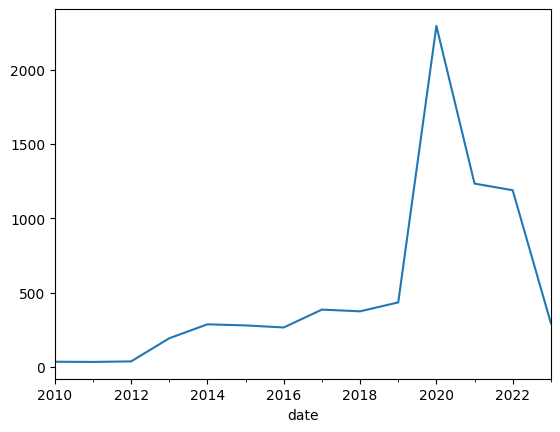

In [32]:
df_tesla.resample(rule="A").max()['open'].plot()

<Axes: xlabel='date'>

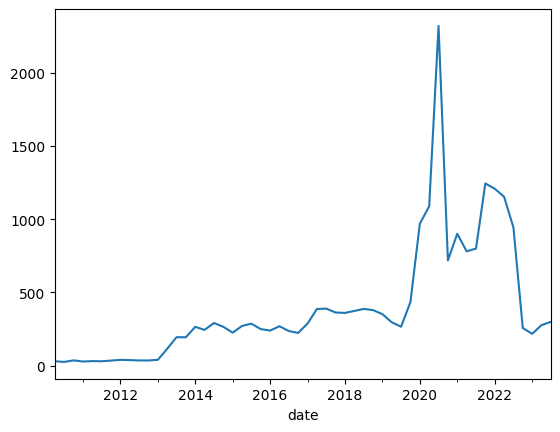

In [34]:
#Quarterly
df_tesla.resample(rule="QS").max()['high'].plot()

<Axes: xlabel='date'>

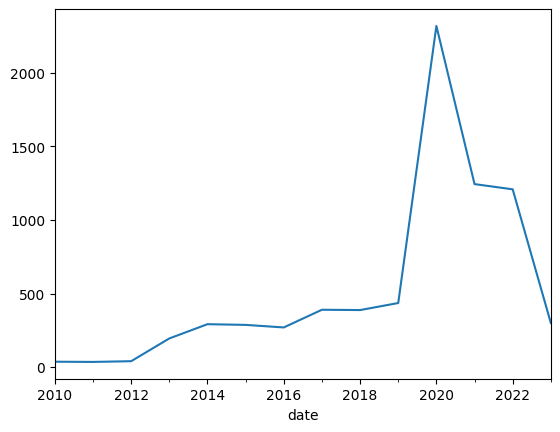

In [36]:
#Business end frequency
df_tesla.resample(rule="BA").max()['high'].plot()

In [39]:
df_tesla.resample(rule="BA").max()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
date,,,,,,,,
2010-12-31,35.8701,36.4200,34.7499,35.4699,18783278,2.3647,19.20,7.432622e+07
2011-12-30,34.6299,35.0001,34.0311,34.9401,11522339,2.3293,17.04,3.258001e+07
2012-12-31,38.1900,39.9501,37.1103,38.0100,5684951,2.5340,16.72,2.645910e+07
2013-12-31,193.9599,194.4999,188.3700,193.3701,37163900,12.8913,24.40,2.630310e+08
2014-12-31,287.6700,291.4200,280.4001,286.0401,32796998,19.0693,15.74,1.839847e+08
2015-12-31,280.1949,286.6500,276.3000,282.2601,15649609,18.8173,11.17,9.350978e+07
2016-12-30,266.4501,269.3400,254.5101,265.4199,23742406,17.6947,8.71,1.056005e+08
2017-12-29,386.6901,389.6100,379.3452,384.9999,19791417,25.6667,7.27,1.449568e+08
2018-12-31,375.0000,387.4599,367.1199,379.5699,33649686,25.3047,17.35,1.960108e+08


<Axes: xlabel='date'>

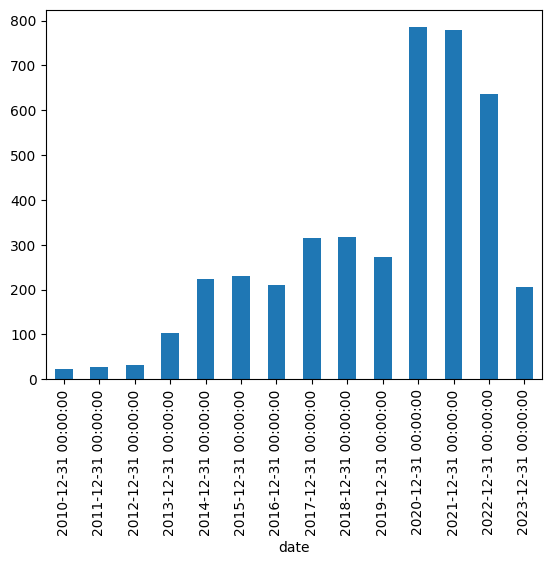

In [41]:
df_tesla['open'].resample(rule="A").mean().plot(kind="bar")

<Axes: xlabel='date'>

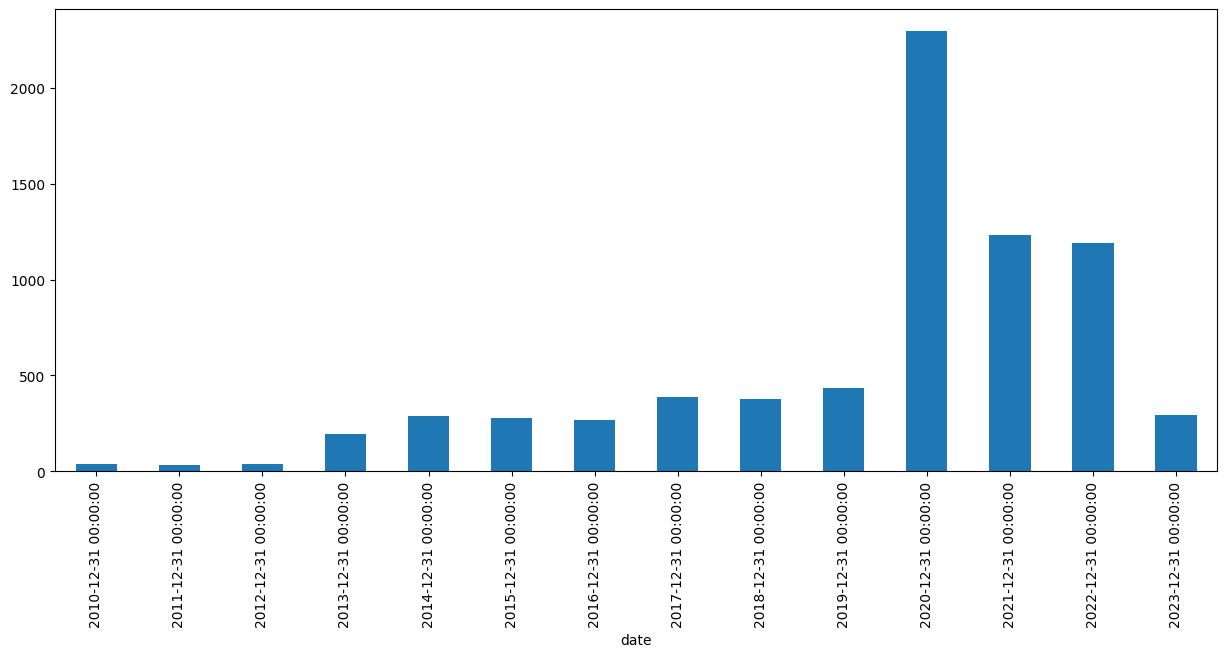

In [49]:
df_tesla['open'].resample(rule="A").max().plot(kind="bar", figsize=(15, 6))

#### Rolling Mean

For smoothing

In [50]:
df_tesla["high"].head()

date
2010-06-29    24.9999
2010-06-30    30.4191
2010-07-01    25.9200
2010-07-02    23.1000
2010-07-06    20.0001
Name: high, dtype: float64

In [52]:
df_tesla["high"].rolling(10).mean().head(30)

date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    21.31989
2010-07-14    20.83491
2010-07-15    19.94301
2010-07-16    19.48101
2010-07-19    19.39602
2010-07-20    19.58100
2010-07-21    20.00802
2010-07-22    20.38101
2010-07-23    20.74701
2010-07-26    21.09003
2010-07-27    21.34404
2010-07-28    21.41904
2010-07-29    21.35703
2010-07-30    21.27102
2010-08-02    21.14301
2010-08-03    21.15303
2010-08-04    21.28101
2010-08-05    21.31101
2010-08-06    21.17100
2010-08-09    21.01899
2010-08-10    20.86599
Name: high, dtype: float64

In [53]:
df_tesla["Open:30 days rolling"] = df_tesla["open"].rolling(30).mean()

In [56]:
df_tesla[["open", "Open:30 days rolling"]].head(34)

,open,Open:30 days rolling
date,,
2010-06-29,18.9999,NaN
2010-06-30,25.7901,NaN
2010-07-01,24.9999,NaN
2010-07-02,23.0001,NaN
2010-07-06,20.0001,NaN
2010-07-07,16.4001,NaN
2010-07-08,16.1400,NaN
2010-07-09,17.5800,NaN
2010-07-12,17.9499,NaN


<Axes: xlabel='date'>

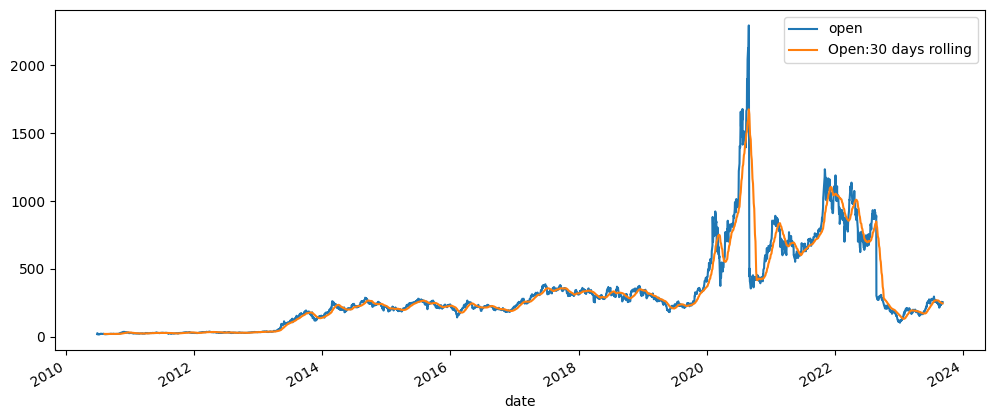

In [59]:
df_tesla[["open", "Open:30 days rolling"]].plot(figsize=(12,5))